# Deep Neural Network Implementation
The following Jupyter Notebook is an implementation of a Deep Neural Network using Python. The architecture that we will use is as follows:

![Neural Network Architecture](nn_full.svg)

We will have two inputs, and two hidden layers of 5 neurons each with a ReLu activation function, at the output we will have just one neuron with a sigmoid activation function. 

## Load library dependencies
First we load our library dependencies, in this case we use three python libraries:
 * NumPy
 * Scikit-learn
 * Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will use the [moons dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) which is a simple toy dataset to visualize clustering and classification algorithms with the `get_dataset` function from the `dataset` library. 

In [2]:
from dataset import get_dataset

X_train shape = (1500, 2)
X_test shape = (500, 2)
y_train shape = (1500,)
y_test shape = (500,)
X train max value: 2.55
X train min value: -1.57


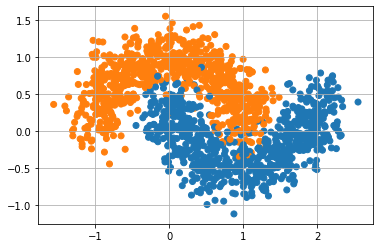

In [3]:
random_state = 123
# Get training and test data from moons dataset
X, Y, X_val, Y_val, X_test, Y_test = get_dataset(random_state=random_state)

## Forward Pass Functions
In this part we will define the forward pass functions needed for our neural network.

As a first step, we need to create our two activation functions:
* Sigmoid
$$f(x) = \frac{1}{1+e^{-x}}$$
* ReLu
$$f(x) = \max{(0, x)}$$

In [4]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    ## START WRITING CODE HERE
    A = 1/(1+np.exp(-Z))
    ## FINISH WRITING CODE
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    ## START WRITING CODE HERE
    A = np.maximum(0,Z)
    ## FINISH WRITING CODE
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

Now we need to define the `linear_forward` function, which performs the following calculation in the forward pass:
$$ Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$$

In [5]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ## START WRITING CODE HERE
    Z = np.dot(W, A) + b
    ## FINISH WRITING CODE
    
    assert (Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

The `linear_activation_forward` function performs the following two steps:
 * the `linear_forward` calculation and then, 
 * the activation function calculation, which can be a ReLu or sigmoid in our case.

In [6]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation
    to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ## START WRITING CODE HERE
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ## FINISH WRITING CODE

    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ## START WRITING CODE HERE
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ## FINISH WRITING CODE

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

Finally, for the forward pass, we need to define the cost function. Our cost function is given by the [Cross Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression), therefore remember to average your result at the end.

In [7]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by
    https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1]

    # Compute loss from AL and Y.
    ## START WRITING CODE HERE
    cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    ## FINISH WRITING CODE

    return cost

## Backward Pass Functions
For the backward propagation part, we first need to define the derivatives for both the sigmoid and ReLu functions, and with this implement the backward propagation of the input `dA` to obtain the output `dZ`.

The equations for de derivatives are as follows:
* Sigmoid
$$ \frac{\partial f(x)}{\partial x} = \frac{1}{1+e^{-x}}\left(1-\frac{1}{1+e^{-x}}\right)$$

* ReLu
$$ \frac{\partial f(x)}{\partial x} = \begin{cases}
        0 & \text{if } x \lt 0\\
        1 & \text{if } x \geq 0
    \end{cases}$$

In [8]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    ## START WRITING CODE HERE
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    ## FINISH WRITING CODE
    
    assert (dZ.shape == Z.shape)
    
    return dZ


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well.
    ## START WRITING CODE HERE
    dZ[Z <= 0] = 0
    ## FINISH WRITING CODE
    
    assert (dZ.shape == Z.shape)
    
    return dZ



In the `linear_backward` function, you will need to implement the linear portion of backward propagation for a single layer.

In [9]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ## START WRITING CODE HERE
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    ## FINISH WRITING CODE

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

For the `linear_activation_backward` you will implement the backward pass of linear layer and the derivative of the activation function. Depending on the activation function, you will need to implement different pieces of code.

In [10]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        ## START WRITING CODE HERE
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ## FINISH WRITING CODE

    elif activation == "sigmoid":
        ## START WRITING CODE HERE
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ## FINISH WRITING CODE

    return dA_prev, dW, db

Finally you will have to create a function called `cost_gradient` that will calculate the gradient of the cost.

In [11]:
def cost_gradient(AL, Y):
    """
    Implement the gradient of the cost function defined 
    
    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    dAL -- gradient of cross-entropy cost
    """
    m = Y.shape[1]
    ## START WRITING CODE HERE
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ## FINISH WRITING CODE
    return dAL

## Initialize Parameters
We will implement an auxiliary function called `initialize_parameters_deep` which will take a list of values containing the dimensions of each layer in our network. This function will return a dictionary of `parameters` where each key is either a weight or a bias initialized accordingly to a random value or zero.

In [12]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)  # number of layers in the network

    ## START WRITING CODE HERE
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    ## FINISH WRITING CODE

        assert (parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert (parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

## Putting all Together
After defining all the necesary blocks to perform forward and backward pass, we will implement three functions:
* `forward_propagation` which will calculate the forward pass of our neural network model
* `backward_propagation` which will be in charge of performing the backward calculation to obtain the gradients
* `update` which will update the new weights and bias according the the gradients

A function `accuracy` is provided to evaluate our model's performance.

In [13]:
def forward_propagation(X, parameters, inference=True):
    ## START WRITING CODE HERE
    A1, cache1 = linear_activation_forward(X, parameters['W1'], parameters['b1'], activation='relu')

    A2, cache2 = linear_activation_forward(A1, parameters['W2'], parameters['b2'], activation='relu')

    AL, cache3 = linear_activation_forward(A2, parameters['W3'], parameters['b3'], activation='sigmoid')
    
    ## FINISH WRITING CODE
    if(inference==True):
        return AL
    else:
        return AL, cache1, cache2, cache3


def backward_propagation(dAL, cache1, cache2, cache3):
    ## START WRITING CODE HERE
    dA2, dW3, db3 = linear_activation_backward(dAL, cache3, activation='sigmoid')
    dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='relu')
    dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')
    
    gradients = {'dW3': dW3,
                 'db3': db3,
                 'dW2': dW2,
                 'db2': db2,
                 'dW1': dW1,
                 'db1': db1}
    ## FINISH WRITING CODE
    return gradients


def update(parameters, gradients, learning_rate):
    ## START WRITING CODE HERE
    parameters['W1'] = parameters['W1'] - learning_rate*gradients['dW1']
    parameters['b1'] = parameters['b1'] - learning_rate*gradients['db1']
    parameters['W2'] = parameters['W2'] - learning_rate*gradients['dW2']
    parameters['b2'] = parameters['b2'] - learning_rate*gradients['db2']
    parameters['W3'] = parameters['W3'] - learning_rate*gradients['dW3']
    parameters['b3'] = parameters['b3'] - learning_rate*gradients['db3']
    ## FINISH WRITING CODE
    return parameters


def accuracy(Y_pred, Y, threshold=0.5):
    """
    Function that calculates the accuracy of our model.
    
    Arguments:
    Y_pred -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    threshold -- float number that sets the limit to select between true and false in our prediction. 

    Returns:
    accuracy -- ratio between correct and total samples
    
    """
    
    total_samples = Y.shape[1]
    correct = np.sum((Y_pred > threshold).astype('int') == Y)
    incorrect = total_samples - correct
    accuracy = correct / total_samples
    
    return accuracy

## Implement your Neural Network
Now you will implement your neural network. You can try to train it with different `epochs` and `learning_rate` values. You can also try to change the dimensions of your network!

In [14]:
# Hyperparameters
epochs = 1000
learning_rate = 0.75

# Initialize parameters
parameters = initialize_parameters_deep((2,5,5,1))

# Keep track of accuracy and cost
epoch_train_accuracy = []
epoch_val_accuracy = []
total_cost = []


for j in range(epochs):

    ####### FORWARD PASS
    # Linear activations
    AL, cache1, cache2, cache3 = forward_propagation(X, parameters, inference=False)
    
    # Compute cost
    cost = compute_cost(AL, Y)

    ####### BACKWARD PASS
    # Gradient of cost with respect of AL
    dAL = cost_gradient(AL, Y)

    # Backpropagation
    gradients = backward_propagation(dAL, cache1, cache2, cache3)

    ####### UPDATE
    parameters = update(parameters, gradients, learning_rate)

    
    ####### EVALUATE MODEL        
    # Test results on every iteration on training data
    AL = forward_propagation(X, parameters)
    train_accuracy = accuracy(AL, Y)
    epoch_train_accuracy.append(train_accuracy)
    
    # Test results on every iteration on validation data
    AL = forward_propagation(X_val, parameters)
    val_accuracy = accuracy(AL, Y_val)
    epoch_val_accuracy.append(val_accuracy)

    ####### TRACK COST
    # Calculate cost on every iteration
    total_cost.append(cost)
    print('epoch = {}, total cost = {:.6f}'.format(j + 1, cost)) 

epoch = 1, total cost = 0.693147
epoch = 2, total cost = 0.693139
epoch = 3, total cost = 0.693134
epoch = 4, total cost = 0.693131
epoch = 5, total cost = 0.693128
epoch = 6, total cost = 0.693127
epoch = 7, total cost = 0.693126
epoch = 8, total cost = 0.693125
epoch = 9, total cost = 0.693125
epoch = 10, total cost = 0.693125
epoch = 11, total cost = 0.693124
epoch = 12, total cost = 0.693124
epoch = 13, total cost = 0.693124
epoch = 14, total cost = 0.693124
epoch = 15, total cost = 0.693124
epoch = 16, total cost = 0.693124
epoch = 17, total cost = 0.693124
epoch = 18, total cost = 0.693124
epoch = 19, total cost = 0.693124
epoch = 20, total cost = 0.693124
epoch = 21, total cost = 0.693124
epoch = 22, total cost = 0.693124
epoch = 23, total cost = 0.693124
epoch = 24, total cost = 0.693124
epoch = 25, total cost = 0.693124
epoch = 26, total cost = 0.693124
epoch = 27, total cost = 0.693124
epoch = 28, total cost = 0.693124
epoch = 29, total cost = 0.693124
epoch = 30, total cost 

epoch = 315, total cost = 0.689430
epoch = 316, total cost = 0.689032
epoch = 317, total cost = 0.688581
epoch = 318, total cost = 0.688067
epoch = 319, total cost = 0.687483
epoch = 320, total cost = 0.686815
epoch = 321, total cost = 0.686050
epoch = 322, total cost = 0.685172
epoch = 323, total cost = 0.684161
epoch = 324, total cost = 0.682996
epoch = 325, total cost = 0.681649
epoch = 326, total cost = 0.680089
epoch = 327, total cost = 0.678277
epoch = 328, total cost = 0.676171
epoch = 329, total cost = 0.673718
epoch = 330, total cost = 0.670855
epoch = 331, total cost = 0.667509
epoch = 332, total cost = 0.663597
epoch = 333, total cost = 0.659023
epoch = 334, total cost = 0.653676
epoch = 335, total cost = 0.647429
epoch = 336, total cost = 0.640142
epoch = 337, total cost = 0.631679
epoch = 338, total cost = 0.621905
epoch = 339, total cost = 0.610683
epoch = 340, total cost = 0.597975
epoch = 341, total cost = 0.583787
epoch = 342, total cost = 0.568249
epoch = 343, total c

epoch = 644, total cost = 0.301495
epoch = 645, total cost = 0.301209
epoch = 646, total cost = 0.301557
epoch = 647, total cost = 0.301252
epoch = 648, total cost = 0.301619
epoch = 649, total cost = 0.301305
epoch = 650, total cost = 0.301706
epoch = 651, total cost = 0.301376
epoch = 652, total cost = 0.301799
epoch = 653, total cost = 0.301453
epoch = 654, total cost = 0.301887
epoch = 655, total cost = 0.301523
epoch = 656, total cost = 0.301966
epoch = 657, total cost = 0.301585
epoch = 658, total cost = 0.302039
epoch = 659, total cost = 0.301640
epoch = 660, total cost = 0.302095
epoch = 661, total cost = 0.301680
epoch = 662, total cost = 0.302142
epoch = 663, total cost = 0.301703
epoch = 664, total cost = 0.302169
epoch = 665, total cost = 0.301716
epoch = 666, total cost = 0.302171
epoch = 667, total cost = 0.301709
epoch = 668, total cost = 0.302152
epoch = 669, total cost = 0.301669
epoch = 670, total cost = 0.302103
epoch = 671, total cost = 0.301612
epoch = 672, total c

epoch = 977, total cost = 0.266877
epoch = 978, total cost = 0.267500
epoch = 979, total cost = 0.266775
epoch = 980, total cost = 0.267379
epoch = 981, total cost = 0.266660
epoch = 982, total cost = 0.267249
epoch = 983, total cost = 0.266539
epoch = 984, total cost = 0.267115
epoch = 985, total cost = 0.266406
epoch = 986, total cost = 0.266967
epoch = 987, total cost = 0.266270
epoch = 988, total cost = 0.266822
epoch = 989, total cost = 0.266137
epoch = 990, total cost = 0.266682
epoch = 991, total cost = 0.266004
epoch = 992, total cost = 0.266545
epoch = 993, total cost = 0.265880
epoch = 994, total cost = 0.266387
epoch = 995, total cost = 0.265738
epoch = 996, total cost = 0.266251
epoch = 997, total cost = 0.265615
epoch = 998, total cost = 0.266122
epoch = 999, total cost = 0.265497
epoch = 1000, total cost = 0.265999


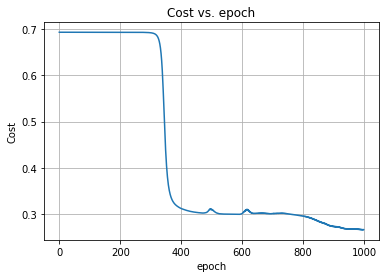

In [15]:
plt.plot(total_cost)
plt.title('Cost vs. epoch')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.grid('on')
plt.show()

## Analysis of our Results
In this part you will see the error analysis on our train and evaluation data.


Training information: 
Min Error = 12.07%
Max Error = 49.67%


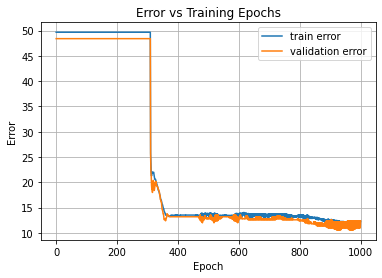

In [16]:
# Error analysis
train_error = 1 - np.array(epoch_train_accuracy)
val_error = 1 - np.array(epoch_val_accuracy)
print('\nTraining information: ')
print('Min Error = {:.2f}%'.format(100 * train_error.min()))
print('Max Error = {:.2f}%'.format(100 * train_error.max()))

plt.plot(train_error * 100, label='train error')
plt.plot(val_error * 100, label='validation error')
plt.title('Error vs Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid('on')
plt.legend()
plt.show()

In [17]:
# Test inference on test data
AL = forward_propagation(X_test, parameters)
test_accuracy = accuracy(AL, Y_test)

#correct_test, incorrect_test, epoch_inference_test, AL_test = inference(X_test, Y_test, parameters)
error_test = 1 - np.array(test_accuracy)
print('\nInference on test data: ')
print('Error = {:.2f}%'.format(100 * error_test))


Inference on test data: 
Error = 10.00%
